In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt

import time

In [4]:
path = r'C:\Users\hard\drive\filepath\astros_bangs_20200127.xlsx'

In [5]:
# Import sign stealing data as astro
# analysis conducted with the assumption that it is not reasonable for the batter to assume that no bang = Fastball
pd.set_option('display.max_columns', None)
astro = pd.read_excel(path)
astro.head(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id
0,1,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,B,Ball,f,f,f,1473,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:41-05,170404002442,32,ca9ed282-a9c3-45a6-ac10-d216fae7ce8b,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
1,2,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,F,Foul,f,f,f,1489,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:24:57-05,170404002458,33,7f89900c-faed-485c-a6b6-41c0a2b1c26f,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
2,3,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SL,BR,n,NaN,B,Ball,f,f,f,1512,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:20-05,170404002521,34,6c875b0c-b4e3-4521-b1c0-447ee785bff9,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
3,4,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,George Springer,Home Run,SI,FB,n,NaN,E,"In play, run(s)",f,f,f,1529,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:25:37-05,170404002538,35,1421aabe-7063-4902-9a46-4b2c239394cb,1421aabe-7063-4902-9a46-4b2c239394cb,136,117
4,5,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Alex Bregman,Single,FF,FB,n,NaN,D,"In play, no out",f,f,f,1580,https://www.youtube.com/watch?v=af5e55Cc8ZA&t=...,2017-04-03 19:26:28-05,170404002636,40,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,136,117


In [6]:
#Cleaning data
# OT pitch category is so minescule we will drop
astro = astro[astro['pitch_category'] != 'OT']
# Dropping columns we dont need.
astro.drop(['pitch_youtube_seconds','youtube_url','pitch_playid','game_pk','pitch_datetime','event_number','game_pitch_id','away_team_id','home_team_id','call_code','top_bottom','game_id'], axis=1,inplace=True)
# Casting  game date as a date
astro['game_date'] = pd.to_datetime(astro['game_date'])
#using a lambda expression to just get the month.
astro['Month'] = astro['game_date'].apply( lambda time: time.month)
#Creating a dictionary and mapping month names to the name
month = {4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept'}
astro['Month_Name'] = astro['Month'].map(month)
#grouping by the last pitch of the PA
ab = astro.groupby('atbat_playid').tail(1)
#dropping catchers interfence rows
ab.drop([37,1391,1457,2976], axis=0, inplace=True)

astro.head()

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name
0,1,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,Ball,f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April
1,2,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,Foul,f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April
2,3,2017-04-03,SEA,0,3,1,George Springer,Home Run,SL,BR,n,NaN,Ball,f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April
4,5,2017-04-03,SEA,0,3,1,Alex Bregman,Single,FF,FB,n,NaN,"In play, no out",f,f,f,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,4,April


Exploring the data

In [7]:

ab['at_bat_event'].value_counts()

Groundout              408
Strikeout              368
Single                 321
Flyout                 238
Walk                   168
Lineout                145
Pop Out                115
Double                 109
Home Run                80
Grounded Into DP        50
Forceout                40
Sac Fly                 24
Field Error             21
Hit By Pitch            17
Double Play             11
Runner Out               7
Sac Bunt                 7
Triple                   6
Strikeout - DP           4
Fielders Choice Out      2
Bunt Groundout           2
Fan interference         1
Batter Interference      1
Bunt Pop Out             1
Name: at_bat_event, dtype: int64

At_Bat_Event's analyized in binary terms of Outcome

** In part five I am going to look at opportunities simplified in terms of postive or negative outcomes. I will look at these outcomes over the course of the 58 games and for PA where a bang was heard on the outcome pitch. I transformed the data into binary variables of either positive or negative outcomes. Then I can transform the data into aggregate counts for outcomes by month and cross with bang count data

In [8]:
# Mapping at_bat_event's to positive or negative outcomes
# Positive outcomes are any at_bat_event where a run is scored or when the batter safely reaches base
# Negative outcomes are when the at_bat_event produces a out
outcome = {'Groundout':'negative','Strikeout':'negative','Single':'positive', 'Flyout':'negative','Walk':'positive','Lineout':'negative','Pop Out':'negative','Double':'positive','Home Run':'positive','Grounded Into DP':'negative', 'Forceout':'negative','Sac Fly':'positive',
    'Field Error': 'positive', 'Hit By Pitch':'positive','Double Play':'negative','Runner Out':'negative','Sac Bunt':'positive','Triple':'positive','Strikeout - DP': 'negative','Fielders Choice Out':'negative','Bunt Groundout':'negative','Fan interference':'negative',
    'Batter Interference': 'positive','Bunt Pop Out': 'negative'}

ab['outcome'] = ab['at_bat_event'].map(outcome)
ab.head()

,Line ID,game_date,opponent,final_away_runs,final_home_runs,inning,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,description,on_1b,on_2b,on_3b,atbat_playid,Month,Month_Name,outcome
3,4,2017-04-03,SEA,0,3,1,George Springer,Home Run,SI,FB,n,NaN,"In play, run(s)",f,f,f,1421aabe-7063-4902-9a46-4b2c239394cb,4,April,positive
4,5,2017-04-03,SEA,0,3,1,Alex Bregman,Single,FF,FB,n,NaN,"In play, no out",f,f,f,3a7c0b8b-3b0c-4832-90d0-5d8425d0b995,4,April,positive
10,11,2017-04-03,SEA,0,3,1,Jose Altuve,Strikeout,SL,BR,n,NaN,Swinging Strike,t,f,f,0813793b-63a1-4179-b681-675180afe82d,4,April,negative
12,13,2017-04-03,SEA,0,3,1,Carlos Correa,Double Play,SI,FB,n,NaN,"In play, out(s)",f,t,f,30e83a48-6d1d-4edd-855c-eb317bfcdaf8,4,April,negative
17,18,2017-04-03,SEA,0,3,2,Carlos Beltran,Strikeout,FF,FB,n,NaN,Called Strike,f,f,f,164cb4d8-c519-4261-85a7-bba6bff79128,4,April,negative


In [9]:
# using group by to count the number of outcomes by month
outcomes = ab.groupby(['Month_Name','Month','outcome'])['outcome'].count()
ab_outcomes = pd.DataFrame(data=outcomes)
ab_outcomes = ab_outcomes.rename(columns={'outcome':'count'})
ab_outcomes = ab_outcomes.reset_index()
ab_outcomes = ab_outcomes.sort_values(by='Month',ascending=True)
ab_outcomes


,Month_Name,Month,outcome,count
0,April,4,negative,291
1,April,4,positive,141
8,May,5,negative,258
9,May,5,positive,143
6,Jun,6,negative,212
7,Jun,6,positive,124
4,Jul,7,negative,168
5,Jul,7,positive,113
2,Aug,8,negative,300
3,Aug,8,positive,149


In [10]:
# Down selecting data to just look at outcomes were a bang was heard.
ab_y =  ab[ab['has_bangs'] == 'y']
bangs_month = ab_y.groupby(['Month_Name','Month','has_bangs','outcome'])['has_bangs'].count()
bangs_month = pd.DataFrame(data=bangs_month)
bangs_month = bangs_month.rename(columns={'has_bangs':'count'})
bangs_month = bangs_month.reset_index()
bangs_month = bangs_month.sort_values(by='Month',ascending=True)
# giving uninque column names
bangs_month.rename(columns={'Month_Name':'Month_b','Month':'Months_b','outcome':'outcome_b','count':'count_b'}, inplace=True)
bangs_month

,Month_b,Months_b,has_bangs,outcome_b,count_b
0,April,4,y,negative,4
1,April,4,y,positive,3
8,May,5,y,negative,4
9,May,5,y,positive,2
6,Jun,6,y,negative,41
7,Jun,6,y,positive,12
4,Jul,7,y,negative,41
5,Jul,7,y,positive,24
2,Aug,8,y,negative,78
3,Aug,8,y,positive,35


In [11]:
# Joining ab_outcomes and bangs_month together
bom = pd.concat([ab_outcomes,bangs_month], axis=1)
# dropping unnessecary columns
bom.drop(columns=['Month_b','Months_b','outcome_b','has_bangs','Month'], inplace=True)
# Providing unique names to columns
bom.rename(columns={'count': 'No_outcomes','count_b':'Bang_count','Month_Name': 'Month'},inplace=True)
bom

,Month,outcome,No_outcomes,Bang_count
0,April,negative,291,4
1,April,positive,141,3
8,May,negative,258,4
9,May,positive,143,2
6,Jun,negative,212,41
7,Jun,positive,124,12
4,Jul,negative,168,41
5,Jul,positive,113,24
2,Aug,negative,300,78
3,Aug,positive,149,35


Does the number of bangs influence positive outcomes?

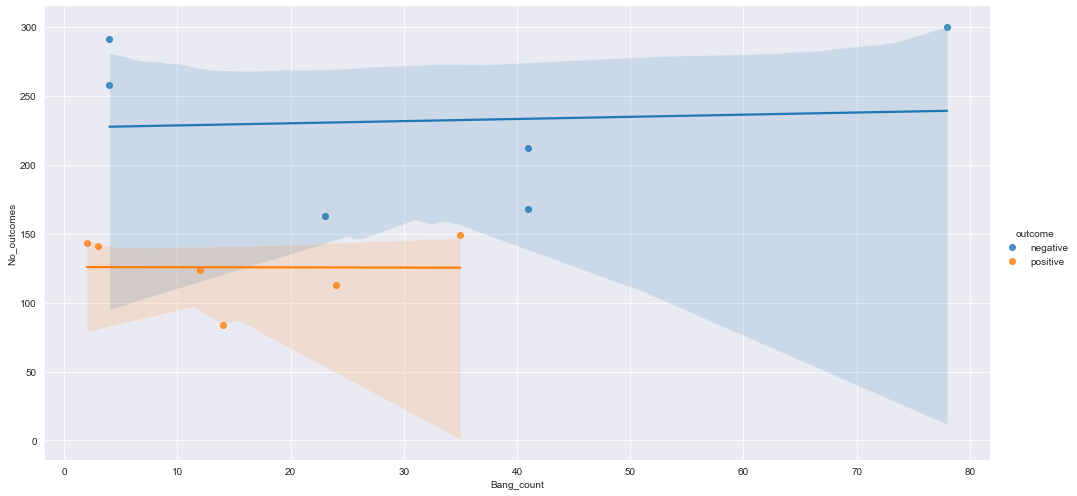

In [16]:
# Plotting Bang counts against outcomes to determine if their is a correlation.
sns.lmplot(data=bom, x='Bang_count',y='No_outcomes',hue='outcome', height=7, aspect=2, fit_reg=True)

Text(0.5, 1.0, 'Number of Bang Outcomes')

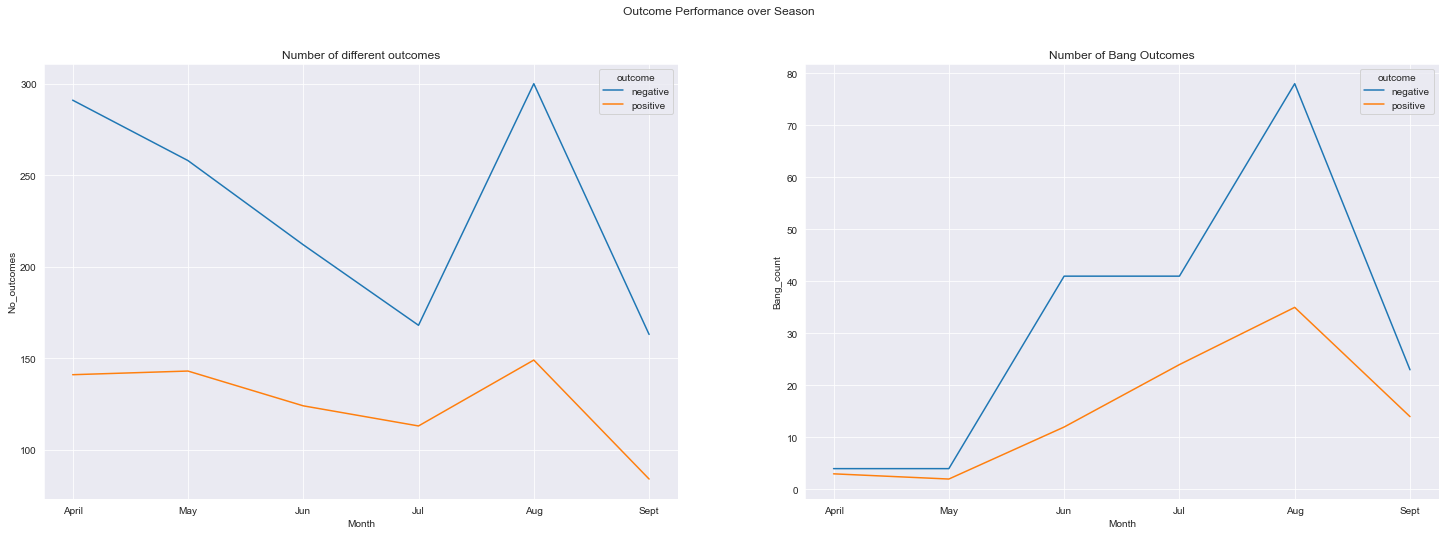

In [15]:
# Comparing positive and negative outcomes to number of heard bangs over the season 
fig, axes = plt.subplots(1,2, figsize=(25,8))
fig.suptitle('Outcome Performance over Season')
sns.set_style('darkgrid')


sns.lineplot(ax=axes[0], data=bom, x='Month', y='No_outcomes',hue='outcome')
axes[0].set_title('Number of different outcomes')

sns.lineplot(ax=axes[1], data=bom, x='Month', y='Bang_count',hue='outcome')
axes[1].set_title('Number of Bang Outcomes')
